title: Low promo code adoption investigation    
author: Fabio Schmidt-Fischbach   
date: 2020-07-10   
region: EU   
tags: acquire, friend referral, promo code, signup

In [ ]:
import pandas as pd
import altair as alt
import numpy as np

In [4]:
query = """

WITH experiments AS ( 

SELECT user_created, se_property
FROM dbt.stg_upper_funnel
group by 1,2 

), 
first_experiment as ( 

select user_created, se_property, count(1)
from experiments 
group by 1,2
having count(1) = 1 

)


SELECT ref.status, zu.*, se_property
FROM dbt.zrh_users as zu 
left join u_referral as ref on ref.user_created = zu.user_created
left join first_experiment as fe on fe.user_created = zu.user_created 
left join referrals on referrals.user_created = zu.user_created
where zu.user_created >= '2020-01-01'


"""

## Part 1. Problem description 

In [33]:
df = pd.read_csv("low_promo_code.csv")

# total signups daily.
df["user_created"] = pd.to_datetime(df["user_created"]).dt.date
df = df.loc[df["user_created"] < pd.to_datetime("2020-07-05"), :]

df["user_created"] = pd.to_datetime(df["user_created"]).dt.week

df = df.groupby(["user_created"])["user_id"].agg("nunique").reset_index()

df["user_created"] = df["user_created"].astype(str)

alt.Chart(df).mark_line().encode(
    x=alt.X("user_created:Q", axis=alt.Axis(title="Signup week")),
    y=alt.Y("user_id:Q", axis=alt.Axis(title="Number of signups")),
).properties(width=500, height=500, title="# of signups")

alt.Chart(...)

Signups did not plummet in the last two weeks - but also did not improve. This suggests that people still finish signup. 

In [48]:
df = pd.read_csv("low_promo_code.csv")

# total signups daily.
df["user_created"] = pd.to_datetime(df["user_created"])
df = df.loc[df["user_created"] < pd.to_datetime("2020-07-05"), :]
df["user_created"] = pd.to_datetime(df["user_created"]).dt.week

# marketing channel
df["channel"] = "other"
df.loc[
    df["last_click_source"].isin(
        [
            "organic_social",
            "other",
            "lost_souls",
            "crm",
            "internal",
            "direct",
            "app_store",
            "brand_influencer",
        ]
    )
    == True,
    "channel",
] = "organic"

df.loc[df["last_click_source"].isin(["organic_search"]) == True, "channel"] = "seo"
df.loc[
    df["last_click_source"].isin(
        [
            "paid_search",
            "paid_search_non_brand",
            "paid_search_brand",
            "paid_search_unknown",
            "paid_social",
            "affiliate",
            "display_ads",
        ]
    )
    == True,
    "channel",
] = "performance"

df.loc[
    df["last_click_source"].isin(["partnership", "ambassador"]) == True, "channel"
] = "partnerships"
df.loc[
    df["last_click_source"].isin(["email_friend_referral", "friend_referral"]) == True,
    "channel",
] = "friend referral"

df = df.groupby(["user_created", "channel"])["user_id"].agg("nunique").reset_index()

df["user_created"] = df["user_created"].astype(str)

alt.Chart(df).mark_line().encode(
    x=alt.X("user_created:Q", axis=alt.Axis(title="Signup week")),
    y=alt.Y("user_id:Q", axis=alt.Axis(title="Number of signups")),
    color="channel:N",
).properties(width=500, height=500, title="# of signups")

alt.Chart(...)

In [7]:
df = pd.read_csv("low_promo_code.csv")

# total signups daily.
df["kyc_first_completed"] = pd.to_datetime(df["kyc_first_completed"]).dt.date
df = df.loc[df["kyc_first_completed"] < pd.to_datetime("2020-07-05"), :]

df["kyc_first_completed"] = pd.to_datetime(df["kyc_first_completed"]).dt.week

df = df.loc[df["kyc_first_completed"].isna() == False, :]

df = df.groupby(["kyc_first_completed"])["user_id"].agg("nunique").reset_index()

df["kyc_first_completed"] = df["kyc_first_completed"].astype(str)

alt.Chart(df).mark_line().encode(
    x=alt.X("kyc_first_completed:Q", axis=alt.Axis(title="KYCc week")),
    y=alt.Y("user_id:Q", axis=alt.Axis(title="Number of KYCc")),
).properties(width=500, height=500, title="# of KYCc")

alt.Chart(...)

In [10]:
df = pd.read_csv("low_promo_code.csv")

# total signups daily.
df["kyc_first_completed"] = pd.to_datetime(df["kyc_first_completed"])
df = df.loc[df["kyc_first_completed"] < pd.to_datetime("2020-07-05"), :]
df["kyc_first_completed"] = pd.to_datetime(df["kyc_first_completed"]).dt.week

# marketing channel
df["channel"] = "other"
df.loc[
    df["last_click_source"].isin(
        [
            "organic_social",
            "other",
            "lost_souls",
            "crm",
            "internal",
            "direct",
            "app_store",
            "brand_influencer",
        ]
    )
    == True,
    "channel",
] = "organic"

df.loc[df["last_click_source"].isin(["organic_search"]) == True, "channel"] = "seo"
df.loc[
    df["last_click_source"].isin(
        [
            "paid_search",
            "paid_search_non_brand",
            "paid_search_brand",
            "paid_search_unknown",
            "paid_social",
            "affiliate",
            "display_ads",
        ]
    )
    == True,
    "channel",
] = "performance"

df.loc[
    df["last_click_source"].isin(["partnership", "ambassador"]) == True, "channel"
] = "partnerships"
df.loc[
    df["last_click_source"].isin(["email_friend_referral", "friend_referral"]) == True,
    "channel",
] = "friend referral"

df = df.loc[df["kyc_first_completed"].isna() == False, :]

df = (
    df.groupby(["kyc_first_completed", "channel"])["user_id"]
    .agg("nunique")
    .reset_index()
)

df["kyc_first_completed"] = df["kyc_first_completed"].astype(str)

alt.Chart(df).mark_line().encode(
    x=alt.X("kyc_first_completed:Q", axis=alt.Axis(title="KYCc week")),
    y=alt.Y("user_id:Q", axis=alt.Axis(title="Number of kycc")),
    color="channel:N",
).properties(width=500, height=500, title="# of kycc")

alt.Chart(...)

We see a big drop in friend referral signups and a compensating surge in organic + seo signups. What could be causing this? 

The primary candidate is the "promo-code" feature that the signup team tested and launched. This feature removed the explicit promo-code step and instead included the promo-code entry on the password screen. 

Did we see a drop in friend referral signups in this test? Yes! On the one hand, we pushed % SUI to SU up by 0.7pp we also took a hit on % SU that are friend referrals. 

(Side note: this query now only looks at friend referral usage - the original analysis also considered whether a user had applied any other promo code. The effect size and pattern are the same across both versions but the level is lower if we only consider friend referral promo codes). 

- First graph - % of SU that have friend referral code from promo code experiment: variant performs 3-4pp lower than control. This is sth we already knew.

/Users/fabioschmidt-fischbach/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


[Text(0, 0.5, '% of SU using friend referral'), Text(0.5, 0, 'Group')]

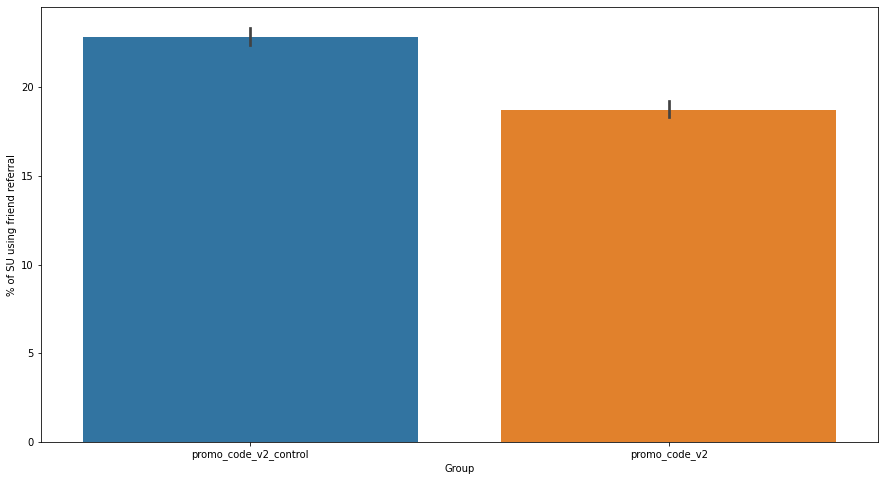

In [3]:
import seaborn as sns
from matplotlib import pyplot as plt

df = pd.read_csv("low_promo_code.csv")

# total signups daily.
df["user_created"] = pd.to_datetime(df["user_created"])
df = df.loc[df["user_created"] < pd.to_datetime("2020-07-05"), :]

df = df.loc[df["se_property"].isin(["promo_code_v2", "promo_code_v2_control"]), :]

df["referral"] = 0
df.loc[df["status"].isna() == False, "referral"] = 100

plt.figure(figsize=(15, 8))
bar = sns.barplot(x="se_property", y="referral", data=df)
bar.set(xlabel="Group", ylabel="% of SU using friend referral")

The alarming thing is not that friend referrals went down but that they went down by much more than we expected. Below you see the % of SU that are friend referrals across time. The drop in the last two weeks exceeds the tested impact. 

In [6]:
df = pd.read_csv("low_promo_code.csv")

# total signups daily.
df["user_created"] = pd.to_datetime(df["user_created"])
df = df.loc[df["user_created"] < pd.to_datetime("2020-07-05"), :]
df["user_created"] = pd.to_datetime(df["user_created"]).dt.week

df["referral"] = 0
df.loc[df["status"].isna() == False, "referral"] = 1
df = df.groupby(["user_created"])["referral"].agg("mean").reset_index()

alt.Chart(df).mark_line().encode(
    x=alt.X("user_created:Q", axis=alt.Axis(title="Signup week")),
    y=alt.Y(
        "referral:Q",
        axis=alt.Axis(title="% of SU that are friend referral", format="%"),
    ),
).properties(width=500, height=500, title="% of SU that are friend referral over time")

alt.Chart(...)

 #### Hypothesis 1. This is just an attribution problem - people still sign up with friend referral codes. 
 
 The way to check this is to not look at marketing attribution (that is generated from snowplow data) but rather from the backend data from uranium. 
 
- Number of friend referral signups in the backend also decreased: our attribution is hence still working as intended. What pushes friend referrals down is a lower % of users entering a promo code. 

In [51]:
df = pd.read_csv("low_promo_code.csv")

# total signups daily.
df["user_created"] = pd.to_datetime(df["user_created"])
df = df.loc[df["user_created"] < pd.to_datetime("2020-07-05"), :]
df["user_created"] = pd.to_datetime(df["user_created"]).dt.week

df["referral"] = 0
df.loc[df["status"].isna() == False, "referral"] = 1
df = df.groupby(["user_created"])["referral"].agg("sum").reset_index()

alt.Chart(df).mark_line().encode(
    x=alt.X("user_created:Q", axis=alt.Axis(title="Signup week")),
    y=alt.Y(
        "referral:Q", axis=alt.Axis(title="Number of signups registered in uranium")
    ),
).properties(
    width=500,
    height=500,
    title="# of signups registered in the backend as friend referral",
)

alt.Chart(...)

#### Hypothesis 2. Fewer people click on the promo code field now. 

We changed the event that was tracking this. Prior the experiment we measure the number of users entering a promo code with the 631 (registration.field_filled) event looking for promo code entries regardless of whether the user entered a valid code or not. 

During and after launch of the feature, the signup team introduced an explicit event for promo code entry that only fires if the code is valid (action = registration.promo_code_entered). This is a more strict definition than before introducing a (hard to quantify) downward bias in the time series. 

- Below I visualize the number of users entering a promo code. This seem to have stayed roughly stable. In terms of quantity, we roughly get 3-5k users each week clicking this which seems reasonable. 

In [56]:
Query = """
select collector_date, count(1) 
from dbt.snowplow as sn 
left join dbt.stg_web_userid  as web on sn.event_id = web.event_id and sn.collector_tstamp >= current_date - interval '2 months'
where collector_date >= current_date - interval '2 months' and 
    (( event_type = 631 and json_extract_path_text(se_label, 'fieldName') like 'promo%')
    or 
    ( event_type = -18473325 ))
    and collector_date < current_date 
group by 1
order by 1 
"""

![](promo_entries.png)

#### Hypothesis 3. More errors are fired. 

It looks like we removed tracking for this with the new feature. 

In [ ]:
query = """
select collector_date, count(distinct web.user_created) 
from dbt.snowplow as sn 
left join dbt.stg_web_userid  as web on sn.event_id = web.event_id and sn.collector_tstamp >= current_date - interval '2 months'
where collector_date >= current_date - interval '2 months' and 
    ( event_type = 632 and json_extract_path_text(se_label, 'fieldName') like 'promo%')
    and collector_date < current_date 
group by 1
order by 1 


"""

#### Hypothesis 4. Re-engagement

[Text(0, 0.5, '% of SU using friend referral'), Text(0.5, 0, 'Group')]

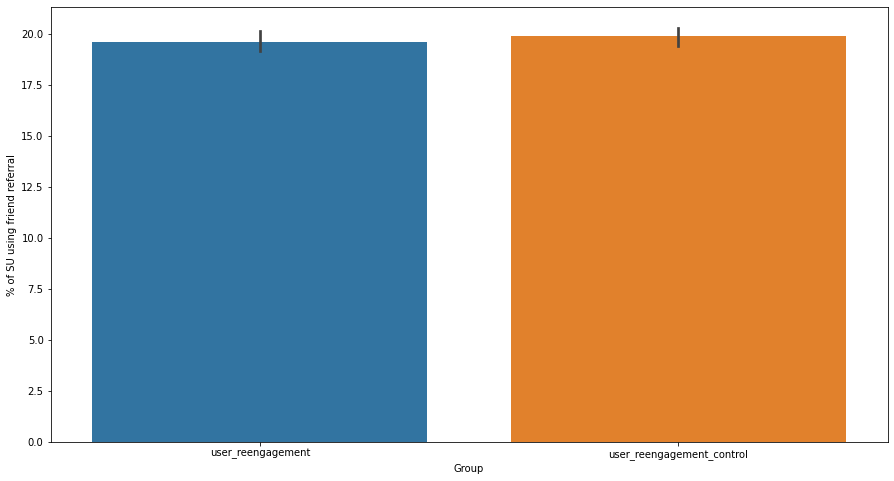

In [4]:
import seaborn as sns
from matplotlib import pyplot as plt

df = pd.read_csv("low_promo_code.csv")

# total signups daily.
df["user_created"] = pd.to_datetime(df["user_created"])
df = df.loc[df["user_created"] < pd.to_datetime("2020-07-05"), :]

df = df.loc[
    df["se_property"].isin(["user_reengagement", "user_reengagement_control"]), :
]

df["referral"] = 0
df.loc[df["status"].isna() == False, "referral"] = 100

plt.figure(figsize=(15, 8))
bar = sns.barplot(x="se_property", y="referral", data=df)
bar.set(xlabel="Group", ylabel="% of SU using friend referral")

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt

df = pd.read_csv("low_promo_code.csv")

# total signups daily.
df["user_created"] = pd.to_datetime(df["user_created"])
df = df.loc[df["user_created"] < pd.to_datetime("2020-07-05"), :]
df = df.loc[df["user_created"] > pd.to_datetime("2020-05-01"), :]

df = df.loc[
    df["se_property"].isin(["user_reengagement", "user_reengagement_control"]), :
]

df["referral"] = 0
df.loc[df["status"].isna() == False, "referral"] = 100

plt.figure(figsize=(15, 8))
bar = sns.barplot(x="user_created", y="referral", hue="se_property", data=df)
bar.set(xlabel="Week", ylabel="% of SU using friend referral")